In [18]:
import os

# Đường dẫn file cần sửa
file_path = '/home/serverai/ltdoanh/Motion_Diffusion/datasets/pymo/pymo/preprocessing.py'

# Đọc nội dung file
with open(file_path, 'r') as f:
    content = f.read()

# Thay thế import sai thành đúng
content = content.replace('from pymo.pymo.rotation_tools', 'from pymo.rotation_tools')

# Ghi lại file
with open(file_path, 'w') as f:
    f.write(content)

print("✅ Đã sửa file preprocessing.py")

✅ Đã sửa file preprocessing.py


In [19]:
import os
import glob

# Tìm tất cả file .py trong thư mục pymo
pymo_dir = '/home/serverai/ltdoanh/Motion_Diffusion/datasets/pymo/pymo/'
files = glob.glob(os.path.join(pymo_dir, '*.py'))

for file_path in files:
    with open(file_path, 'r') as f:
        content = f.read()
    
    # Kiểm tra nếu có import sai
    if 'from pymo.pymo.' in content or 'import pymo.pymo.' in content:
        print(f"🔧 Đang sửa {os.path.basename(file_path)}...")
        
        # Sửa import
        content = content.replace('from pymo.pymo.', 'from pymo.')
        content = content.replace('import pymo.pymo.', 'import pymo.')
        
        # Ghi lại file
        with open(file_path, 'w') as f:
            f.write(content)
        
        print(f"   ✅ Đã sửa!")

print("\n✅ Hoàn tất! Thử import lại.")


✅ Hoàn tất! Thử import lại.


In [20]:
import sys
import os

# --- Thêm sys.path (Giữ nguyên) ---
ROOT = os.path.expanduser("/home/serverai/ltdoanh/Motion_Diffusion/datasets/pymo")
if ROOT not in sys.path:
    sys.path.insert(0, ROOT)

import numpy as np
from sklearn.pipeline import Pipeline
from pymo.parsers import BVHParser, BVHWriter # <-- Cần import BVHParser
from pymo.preprocessing import *
from pymo.viz_tools import draw_stickfigure

In [21]:
# --- Bước 1: Khởi tạo Pipeline (Giữ nguyên) ---
data_pipe = Pipeline([
    ('param', MocapParameterizer('position')),
    ('rcpn', RootCentricPositionNormalizer()),
    ('delta', RootTransformer('abdolute_translation_deltas')),
    ('const', ConstantsRemover()),
    ('np', Numpyfier()),
    ('down', DownSampler(2)),
    ('stdscale', ListStandardScaler())
])

# --- 🔥 BƯỚC 1.5: FIT PIPELINE (BẮT BUỘC) ---
# Chúng ta phải fit pipeline trên 1 file BVH mẫu
# để các bước (như Numpyfier) học được cấu trúc dữ liệu.

print("Đang fit pipeline (để học cấu trúc)...")
parser = BVHParser()

# (Sử dụng 1 file BVH bất kỳ từ tập train, ví dụ từ test.ipynb của bạn)
# (Hãy đảm bảo đường dẫn này đúng)
bvh_file_path = "/home/serverai/ltdoanh/Motion_Diffusion/datasets/BEAT/1/1_wayne_0_1_1.bvh"

try:
    parsed_data = parser.parse(bvh_file_path)
    data_pipe.fit([parsed_data]) # Chỉ cần FIT
    print("Pipeline đã fit thành công.")
except FileNotFoundError:
    print(f"LỖI: Không tìm thấy file BVH mẫu tại: {bvh_file_path}")
    print("Vui lòng cập nhật bvh_file_path đến một file BVH gốc để fit pipeline.")
    # Dừng ở đây nếu không fit được
    raise

# --- Bước 2: Tải mean.npy và std.npy (Giữ nguyên) ---
base_dir = "/home/serverai/ltdoanh/Motion_Diffusion" 
meta_dir = os.path.join(base_dir, "checkpoints/beat/test/meta") 

Đang fit pipeline (để học cấu trúc)...


/home/serverai/ltdoanh/Motion_Diffusion/datasets/pymo/pymo/preprocessing.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pos_df['%s_Yposition'%joint] = pd.Series(data=[e[1] for e in tree_data[joint][1]], index=pos_df.index)
/home/serverai/ltdoanh/Motion_Diffusion/datasets/pymo/pymo/preprocessing.py:152: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pos_df['%s_Zposition'%joint] = pd.Series(data=[e[2] for e in tree_data[joint][1]], index=pos_df.index)
/home/serverai/ltdoanh/Motion_Diffusion/datasets/pymo/pymo/preprocessing.p

Pipeline đã fit thành công.


/home/serverai/ltdoanh/Motion_Diffusion/datasets/pymo/pymo/preprocessing.py:150: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pos_df['%s_Xposition'%joint] = pd.Series(data=[e[0] for e in tree_data[joint][1]], index=pos_df.index)
/home/serverai/ltdoanh/Motion_Diffusion/datasets/pymo/pymo/preprocessing.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pos_df['%s_Yposition'%joint] = pd.Series(data=[e[1] for e in tree_data[joint][1]], index=pos_df.index)
/home/serverai/ltdoanh/Motion_Diffusion/datasets/pymo/pymo/preprocessing.p

Đang tải mean/std từ: /home/serverai/ltdoanh/Motion_Diffusion/checkpoints/beat/test/meta
Đang ghi đè mean/std bằng giá trị đã lưu...
Đang tải file dự đoán: /home/serverai/ltdoanh/Motion_Diffusion/datasets/BEAT_numpy/npy/1/1_wayne_0_1_1_sentence_000.npy...
Đang thực hiện inverse transform...
positions 2 eulers is not supported
Đang visualize... (có thể mất vài giây)


/home/serverai/ltdoanh/Motion_Diffusion/datasets/pymo/pymo/preprocessing.py:595: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df['%s_Yposition'%joint] = pd.Series(data=track.values['%s_Yposition'%joint]+projected_root_pos[ryp], index=new_df.index)
/home/serverai/ltdoanh/Motion_Diffusion/datasets/pymo/pymo/preprocessing.py:596: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df['%s_Zposition'%joint] = pd.Series(data=track.values['%s_Zposition'%joint]+projected_root_pos[rzp], index=new_df.index)
/home/serverai/ltdoanh/Motio

<Axes: >

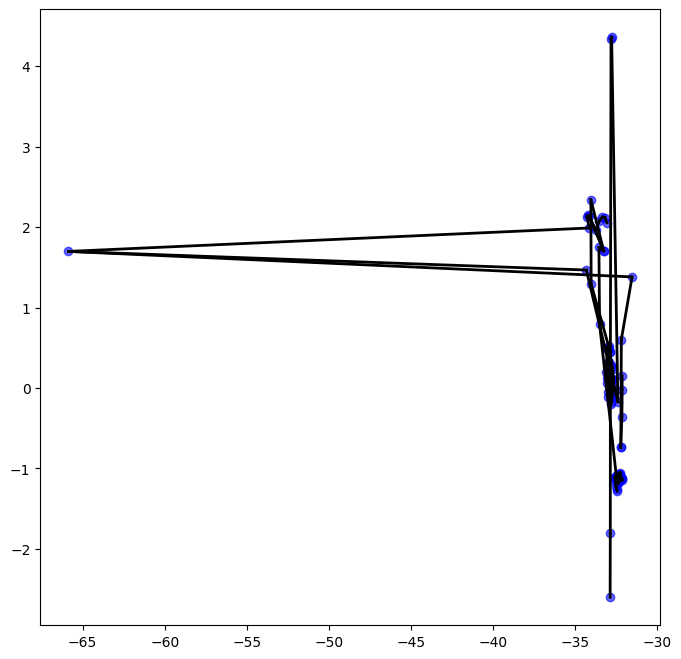

In [24]:
print(f"Đang tải mean/std từ: {meta_dir}")
mean_val = np.load(os.path.join(meta_dir, "mean.npy"))
std_val = np.load(os.path.join(meta_dir, "std.npy"))

# --- Bước 3: GHI ĐÈ mean/std (Giữ nguyên, dùng data_...) ---
print("Đang ghi đè mean/std bằng giá trị đã lưu...")
data_pipe.steps[-1][1].data_mean_ = mean_val 
data_pipe.steps[-1][1].data_std_ = std_val   

# --- Bước 4: Tải file .npy dự đoán ---
# (Lưu ý: Dựa trên hình ảnh của bạn, 'motion.npy' nằm trong 'beat/test')
predicted_motion_path = os.path.join(base_dir, "datasets/BEAT_numpy/npy/1/1_wayne_0_1_1_sentence_000.npy") 
print(f"Đang tải file dự đoán: {predicted_motion_path}...")
predicted_data = np.load(predicted_motion_path)

# --- Bước 5: Biến đổi ngược (Inverse Transform) ---
print("Đang thực hiện inverse transform...")
reconstructed_data = data_pipe.inverse_transform([predicted_data])

# --- Bước 6: Visualize ---
print("Đang visualize... (có thể mất vài giây)")
draw_stickfigure(reconstructed_data[0], frame=50)

In [25]:
# --- 🚀 BƯỚC 7: LƯU RA FILE .BVH (PHẦN MỚI) ---
print("Đang lưu ra file BVH...")

# 1. Khởi tạo BVHWriter
writer = BVHWriter()

# 2. Chỉ định tên file output
output_bvh_path = os.path.join(base_dir, "checkpoints/motion.bvh")

# 3. Ghi file (Truyền thẳng string đường dẫn vào)
try:
    # reconstructed_data là list, lấy phần tử [0]
    writer.write(reconstructed_data[0], output_bvh_path)
    print(f"✅ Đã lưu motion thành công vào: {output_bvh_path}")
except Exception as e:
    print(f"❌ Lỗi khi lưu file BVH: {e}")

Đang lưu ra file BVH...
✅ Đã lưu motion thành công vào: /home/serverai/ltdoanh/Motion_Diffusion/checkpoints/motion.bvh
